<a href="https://colab.research.google.com/github/Muadali/MLA_AAD/blob/main/MLA4_AAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Assignment 4: Decision Trees

**Abdifatah Dahiye**

**CS430-ON**

**Machine Learning in the Cloud**

**Standard Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#1. Import for Decision Trees

In [3]:
from sklearn import tree
from sklearn.tree import export_text

**Imports for Splitting data and building pipeline**

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [6]:
from sklearn import set_config
set_config(display='diagram')

**Imports for performance measures**

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error

**Confusion Matrix Function**

In [7]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

#2. Desicion Tree Classification - Acuire Data

In [8]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

#3. Statistics and Visual Exploration

**This step was done in assignment MLA3_AAD**

#4. Splitting data into Test/Train

In [9]:
X = df[['variance', 'skewness','curtosis', 'entropy']]
y = df['forgery']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=24)

#5. Building the Pipeline

In [11]:
num_attribs = ['variance', 'skewness','curtosis', 'entropy']

In [12]:
col_transform = ColumnTransformer(transformers=[('num', MinMaxScaler(), num_attribs)], remainder='passthrough')

In [13]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('decision_tree',tree.DecisionTreeClassifier(max_depth=5))
                     ])

#6. Executing the Model

In [14]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

#7. Evaluating the Model

In [15]:
y_pred = pipeline.predict(X_test)

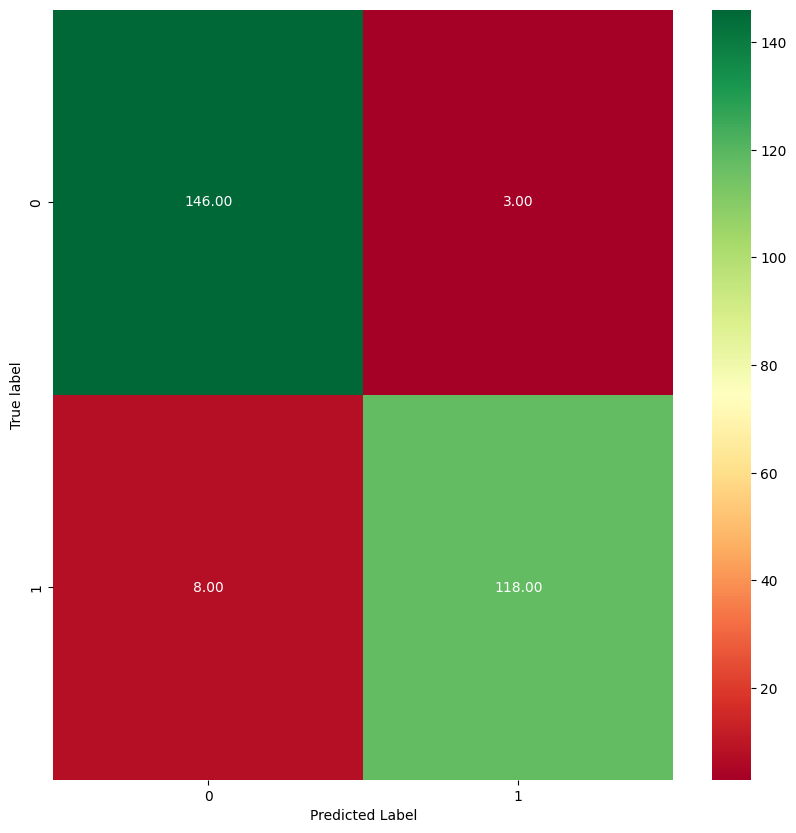

In [16]:
plot_cm(y_test, y_pred)

In [17]:
print('Precision:', precision_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))

Precision: 0.9752066115702479
Recall: 0.9365079365079365
F1 score: 0.9554655870445344


**Precision was roughly roughly 97%. It's really good because of 123 predicitions the model was correct on 119 of those predictions which is a very high number. **

#8. Conclusion

**A Decision Tree classification model is the best in determing whether or not a banknote is a forgery. This is because the score evaluations were in high 90th percentile **

#Decision Tree Regression Model

#1. Acuire Data

In [18]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

In [19]:
df.rename(columns={"Usage_kWh" : "usage_kwh", "Lagging_Current_Reactive.Power_kVarh" : "lag_react_pwr_kvarh", "Leading_Current_Reactive_Power_kVarh" : "lead_react_pwr_kvarh", "Lagging_Current_Power_Factor" : "lag_current_pwr", "Leading_Current_Power_Factor" : "lead_current_pwr", "NSM" : "nsm", "WeekStatus" : "week_status", "Day_of_week" : "day_of_week", "Load_Type" : "load_type"}, inplace=True)

     

#2. Splitting the Data into Test/Train

In [20]:
X = df[['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh','CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm','week_status', 'day_of_week', 'load_type']]


In [21]:

y = df['usage_kwh']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=32)

#Building the pipeline

In [23]:
num_attribs = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh','CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm']
cat_attribs = ['week_status', 'day_of_week','load_type']

In [24]:
col_transform = ColumnTransformer(transformers=[ ('cat',OneHotEncoder(), cat_attribs), ('num',MinMaxScaler(), num_attribs),])
     

In [25]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('decision_tree',tree.DecisionTreeRegressor(max_depth=5))
                     ])

#5. Executing the Model

In [26]:

pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('decision_tree', DecisionTreeRegressor(max_depth=5))])

#6. Evaluating the Model

In [27]:
y_pred = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

In [28]:
print(mean_squared_error(y_train, y_pred_train)**(0.5))
print(mean_squared_error(y_test, y_pred)**(0.5))

3.52492558978113
3.6060394083742846


**The Root squared mean of the train and test sets are seperated by less than a tenth of a point. This is why this model is good in generalizations about the data set. ** 

#7. Conclusion

**To predict the engery usage in KWH for the Steel industry it shows that it best in using Decision Tree Regression model.**